### Introduction to CNN and CV with TensorFlow

In [4]:
import zipfile

# Unzip the dowloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#### Let's visualize samples of our sample

In [2]:
!ls pizza_steak

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os

# Walk through pizza_steak directories and list number of files
for dirpath , dirnames , filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}'.")

There are 2 directories and 0 images in pizza_steak'.
There are 2 directories and 0 images in pizza_steak\test'.
There are 0 directories and 250 images in pizza_steak\test\pizza'.
There are 0 directories and 250 images in pizza_steak\test\steak'.
There are 2 directories and 0 images in pizza_steak\train'.
There are 0 directories and 750 images in pizza_steak\train\pizza'.
There are 0 directories and 750 images in pizza_steak\train\steak'.


### To visualize our images, first let's get the class names programmatically.

In [7]:
# Get he classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names =  np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
    # Setup the target directory (we'll view image from here)
    target_folder = target_dir + target_class
    
    # Get a random image path 
    random_image = random.sample(os.listdir(target_folder) , 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Imgae shape: {img.shape}") # Show the shape of the image
    
    return img

['3609394.jpg']
Imgae shape: (512, 512, 3)


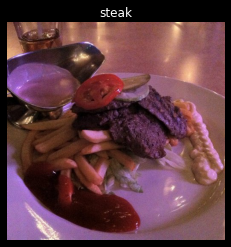

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/" , target_class = "steak")

In [11]:
# The image we've imported and plotted are actually giant arrays/tensors of different pixel values 
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[134,  91,  72],
        [130,  85,  66],
        [132,  85,  65],
        ...,
        [126,  72,  70],
        [122,  68,  66],
        [133,  80,  76]],

       [[126,  81,  62],
        [121,  76,  57],
        [139,  92,  72],
        ...,
        [136,  82,  80],
        [130,  76,  74],
        [133,  79,  77]],

       [[133,  88,  69],
        [127,  82,  61],
        [133,  86,  66],
        ...,
        [131,  77,  75],
        [129,  75,  73],
        [124,  70,  68]],

       ...,

       [[145, 105, 165],
        [143, 103, 163],
        [140, 100, 160],
        ...,
        [158, 117, 115],
        [157, 116, 114],
        [153, 112, 110]],

       [[151, 111, 173],
        [148, 108, 170],
        [145, 105, 167],
        ...,
        [136,  95,  93],
        [139,  98,  96],
        [145, 104, 102]],

       [[153, 113, 175],
        [151, 111, 173],
        [149, 109, 171],
        ...,
        [142, 102, 10

In [12]:
# View the image shape
img.shape

(512, 512, 3)

In [22]:
# Get all the pixel value between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255.

array([[[0.5254902 , 0.35686275, 0.28235294],
        [0.50980392, 0.33333333, 0.25882353],
        [0.51764706, 0.33333333, 0.25490196],
        ...,
        [0.49411765, 0.28235294, 0.2745098 ],
        [0.47843137, 0.26666667, 0.25882353],
        [0.52156863, 0.31372549, 0.29803922]],

       [[0.49411765, 0.31764706, 0.24313725],
        [0.4745098 , 0.29803922, 0.22352941],
        [0.54509804, 0.36078431, 0.28235294],
        ...,
        [0.53333333, 0.32156863, 0.31372549],
        [0.50980392, 0.29803922, 0.29019608],
        [0.52156863, 0.30980392, 0.30196078]],

       [[0.52156863, 0.34509804, 0.27058824],
        [0.49803922, 0.32156863, 0.23921569],
        [0.52156863, 0.3372549 , 0.25882353],
        ...,
        [0.51372549, 0.30196078, 0.29411765],
        [0.50588235, 0.29411765, 0.28627451],
        [0.48627451, 0.2745098 , 0.26666667]],

       ...,

       [[0.56862745, 0.41176471, 0.64705882],
        [0.56078431, 0.40392157, 0.63921569],
        [0.54901961, 0

### An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling or normalization)
# It generate batches of tensor image data with real-time data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to ur data directory
train_dir = "pizza_steak/train" 
test_dir  =  "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                          batch_size = 32,
                                          target_size = (224 ,224),
                                          class_mode = "binary",
                                          seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224 , 224, 3)),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])


# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1  = model_1.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 119s 2s/step - loss: 0.6022 - accuracy: 0.6380 - val_loss: 0.4672 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.4626 - accuracy: 0.7827 - val_loss: 0.3667 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.3969 - accuracy: 0.8200 - val_loss: 0.3949 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.4058 - accuracy: 0.8100 - val_loss: 0.3600 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.3549 - accuracy: 0.8440 - val_loss: 0.3188 - val_accuracy: 0.8800


In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

**Note:** You can think of trainable parameters  as **patterns a model can learn from data**. Intuitively, you might think more is better, and in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most important patters in an image**. So even thought these are less learnable parameters in out CNN, these are often more helpful in dechiphering between different **features** in an image. 

### Binary Classification: Let's break it down

1. Become one with the data (visualize , visualize , visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat oru baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3011642.jpg']
Imgae shape: (384, 512, 3)
['3669673.jpg']
Imgae shape: (512, 512, 3)


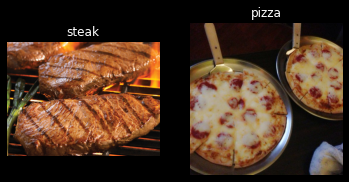

In [33]:
# Visualize data
plt.figure()
plt.subplot(1 , 2 , 1)
steak_img = view_random_image("pizza_steak/train/" , "steak")
plt.subplot(1 , 2  , 2)
pizza_img = view_random_image("pizza_steak/test/" , "pizza")

### 2. Preprocess the data (prepare it for a model)

In [34]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time. A model might only look at 32 at a time.
 
It does this for a couple of reasons:
1. 10,00 images(or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,00 images in one hit could result in the model not being able to learn very well.


In [36]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [37]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224 , 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [38]:
# Get a sample of a train data batch
images , labels = train_data.next() # Get the "next" batch of images/labels in train_data
len(images) , len(labels) 

(32, 32)

In [39]:
# How many batches are there?
len(train_data)

47

In [40]:
1500 / 32

46.875

In [41]:
# Get the first two images
images[:2] , images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [42]:
images[7].shape

(224, 224, 3)

In [43]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. SO one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem).



In [44]:
# Make the creating of tour model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [46]:
# Create the model (this will be our baseline, a layer CNN)
model_4 = Sequential([
    Conv2D(filters = 10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size = 3, # The size of the sliding window going across an input 
           strides = 1, # The size of the step the sliding window takes across an input
           padding = 'valid', # if "same", output shape is same as the input shape, if "valid", output shape gets compressed.
           activation = 'relu',
           input_shape =  (224, 224 , 3)),
    Conv2D(10 , 3 , activation = 'relu'),
    Conv2D(10 , 3 , activation = 'relu'),
    Flatten(),
    Dense(1 , activation = 'sigmoid') # Output layer (working with binary classification so only 1 output neuron)
])

In [47]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [48]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Check the lengths of training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [50]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 130s 3s/step - loss: 1.6143 - accuracy: 0.5833 - val_loss: 0.5129 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 112s 2s/step - loss: 0.4564 - accuracy: 0.8007 - val_loss: 0.3906 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.3312 - accuracy: 0.8713 - val_loss: 0.4157 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.1993 - accuracy: 0.9347 - val_loss: 0.3350 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 118s 3s/step - loss: 0.1063 - accuracy: 0.9700 - val_loss: 0.3688 - val_accuracy: 0.8280


### Evaluating our model
It looks like our model is learning something, let's evaluate it.

<AxesSubplot:>

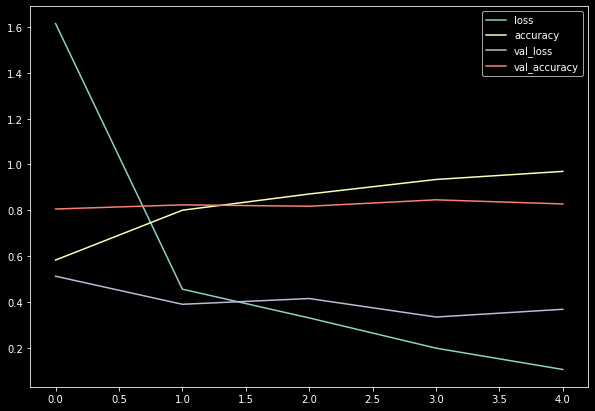

In [51]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10 , 7))

In [85]:
# Plot the validation and training curves separately
def loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics.
    '''
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # How many epochs did we run for?
    
    # Plot loss
    plt.plot(epochs, loss, label = "Training Loss")
    plt.plot(epochs, val_loss, label = "Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = "Training Accuracy")
    plt.plot(epochs, val_accuracy , label = "Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

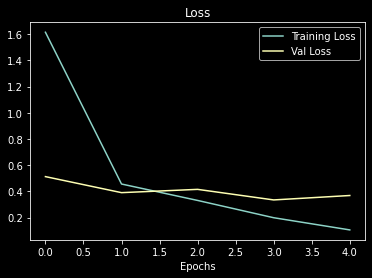

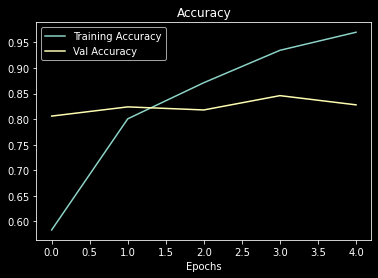

In [86]:
loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other decreasing at similar rates), when there are large differences your model may be `overfitting`.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of cnv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**.

In [88]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation = 'sigmoid')
])

**MaxPool2D:** Max pooling operation for 2D spatial data.

Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the feature axis.

In [89]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [90]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 82s 2s/step - loss: 0.6182 - accuracy: 0.6367 - val_loss: 0.4885 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 46s 967ms/step - loss: 0.4545 - accuracy: 0.7967 - val_loss: 0.3750 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.4022 - accuracy: 0.8153 - val_loss: 0.3300 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 41s 867ms/step - loss: 0.3934 - accuracy: 0.8227 - val_loss: 0.3516 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 33s 708ms/step - loss: 0.3806 - accuracy: 0.8353 - val_loss: 0.3389 - val_accuracy: 0.8620


In [91]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

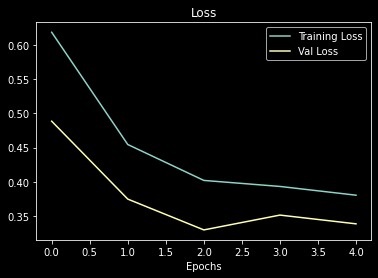

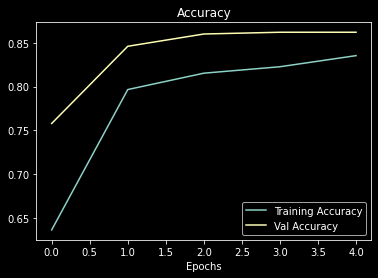

In [92]:
loss_curves(history_5)

### Opening our bag of tricks and finding data augumentation 

**ImageDataGenerator:** Generate batches of tensor image dat with real-time data augumentation. 

In [93]:
# Create ImageDataGenerator training isntance with data augumentation
train_datagen_augumented = ImageDataGenerator(rescale = 1/255.,
                                              rotation_range = 0.2, # How much do you want to rotate an image?
                                              shear_range = 0.2, # How much do you want to shear an image?
                                              zoom_range = 0.2, # 
                                              width_shift_range = 0.2, # Move your image around on the x-axis
                                              height_shift_range = 0.3, # Move your image around on the y-axis
                                              horizontal_flip =True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

**What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [98]:
# Import data and augment it true from training directory
print("Augmented training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                    target_size = (224, 224),
                                                                    batch_size = 32,
                                                                    class_mode = "binary",
                                                                    shuffle = False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224 , 224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in teh directories but are modified as they're loaded into the model.

Finally....let's visualize some augmented data!!! 

In [99]:
# Get sample data batches
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augumented.next() # Note: Labels are'nt augmented... only data (images)

Showing image number: 12


(-0.5, 223.5, 223.5, -0.5)

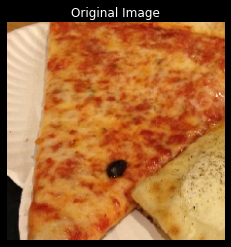

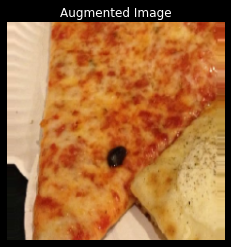

In [100]:
# Show original image and augmented image
import random
random_number = random.randint(0 , 32) # Our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

##### Now we've seen what augmented training data looks like, let's build a model and see how it learns

In [111]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(20, 4, activation = "LeakyReLU"),
    MaxPool2D(pool_size = 3),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(),
    Conv2D(10 , 3 , activation = "LeakyReLU"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augumented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augumented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 119s 2s/step - loss: 0.6988 - accuracy: 0.4727 - val_loss: 0.6845 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 57s 1s/step - loss: 0.7010 - accuracy: 0.5313 - val_loss: 0.6829 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 49s 1s/step - loss: 0.6872 - accuracy: 0.5460 - val_loss: 0.6650 - val_accuracy: 0.5520
Epoch 4/5
47/47 [==============================] - 48s 1s/step - loss: 0.6880 - accuracy: 0.5587 - val_loss: 0.6546 - val_accuracy: 0.6360
Epoch 5/5
47/47 [==============================] - 48s 1s/step - loss: 0.6634 - accuracy: 0.5813 - val_loss: 0.5991 - val_accuracy: 0.7740


In [112]:
model_6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, None, None, 20)    980       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, None, None, 20)   0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, None, None, 10)    1810      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, None, None, 10)  

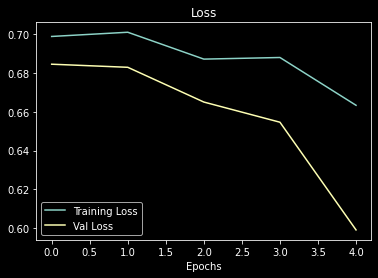

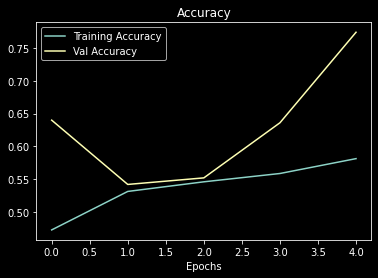

In [113]:
# Plot loss curves
loss_curves(history_6)

**Note:** When shuffling training data, the model get exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instaed of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layer (e.g add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

### Making a prediction with our trained model on our custom data

In [114]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


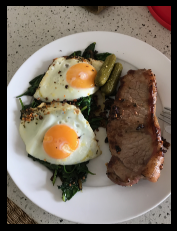

In [116]:
# View our example image
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [117]:
steak.shape

(4032, 3024, 3)

In [118]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> **Note:** When you train a neural network and you want to make a prediction with it on your custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [121]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_pred_image(filename , img_shape = 224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img , size = [img_shape , img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img


In [122]:
# Load in and preprocess our custom image
steak = load_and_pred_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [125]:
pred = model_6.predict(tf.expand_dims(steak , axis = 0))
pred

array([[0.624831]], dtype=float32)

Looks like our custom image is being put through our mode, however, it currently outputs a prediction probability, would'nt it be nice if we could visualize the image as well as the model's prediction

In [124]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [127]:
pred_class  = class_names[int(tf.round(pred))]
pred_class

'steak'

In [128]:
def pred_and_plot(model , filename , class_names = class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """ 
    # Import the target image and preprocess it
    img = load_and_pred_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img , axis = 0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

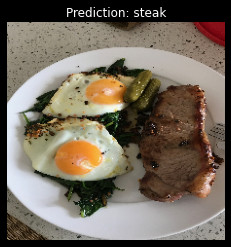

In [129]:
# Test our model on a custom image
pred_and_plot(model_6 , "03-steak.jpeg")

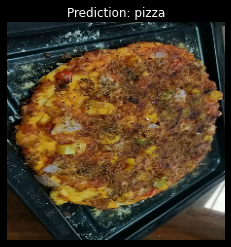

In [130]:
pred_and_plot(model_6 , "photo_6197296865490350763_y.jpg")

### Multi-class Image Classification

#### 1. Import and become one with the data

In [131]:
import zipfile
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , "r")
zip_ref.extractall()
zip_ref.close()

In [132]:
import os

# Walk through 10 classes of food image data
for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data\test'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'
There are 10 directori

In [134]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [137]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1369628.jpg']
Imgae shape: (384, 512, 3)


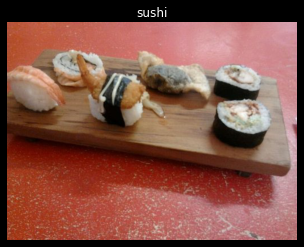

In [140]:
# Visualize, visualize, visualize
import random 
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224 , 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224 , 224),
                                             batch_size = 32,
                                             class_mode = "categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [143]:
model_8 = Sequential([
    Conv2D(20 , 2 , activation = "LeakyReLU" , input_shape = (224 , 224 , 3)),
    Conv2D(15  , 3 , activation = 'relu'),
    MaxPool2D(),
    Conv2D(12 , 4 , activation = "LeakyReLU"),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10 , activation = 'softmax') # Changed to have 10 output neurons and use the softmax activation function
]) 

model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 608s 3s/step - loss: 2.2271 - accuracy: 0.1733 - val_loss: 2.0630 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 517s 2s/step - loss: 2.0236 - accuracy: 0.2873 - val_loss: 1.9894 - val_accuracy: 0.2876
Epoch 3/5
235/235 [==============================] - 539s 2s/step - loss: 1.8040 - accuracy: 0.3839 - val_loss: 1.9785 - val_accuracy: 0.3032
Epoch 4/5
235/235 [==============================] - 433s 2s/step - loss: 1.3926 - accuracy: 0.5343 - val_loss: 2.0790 - val_accuracy: 0.3060
Epoch 5/5
235/235 [==============================] - 1413s 6s/step - loss: 0.8118 - accuracy: 0.7341 - val_loss: 2.6732 - val_accuracy: 0.3044


### 5. Evaluate the model 

In [144]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 97s 1s/step - loss: 2.6732 - accuracy: 0.3044


[2.6731581687927246, 0.3043999969959259]

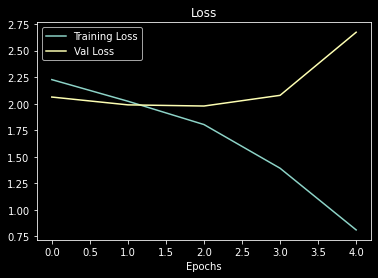

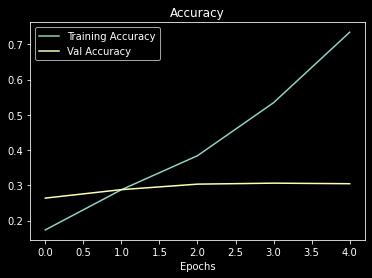

In [145]:
# Check out the model's loss curves on the 10 classes
loss_curves(history_8)

What do these loss curves tell us?

Well.... it seems our model is **ovefitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

#### 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by....
> **Get more data** - Having more data gives a model more opportunity to learn diverse patterns...

> **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce number of layers or reduce number of hidden units in layers

> **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the orginal data)

> **Use transfer learning** - Transfer Learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset. 

In [ ]:
# How about we try and simplify the model first?
# ELt's try to remove 2 convolutional layers....

model_9 = Sequential([
    Conv2D(10 , 3 , activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10 , activation = 'softmax')
]) 

model_9.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [148]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_9 (Dense)             (None, 10)              

#### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validatoin loss curves closer)
* Improve validation accuracy

In [149]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augumented = train_datagen_augmented.flow_from_directory(train_dir,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [151]:
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy']
                 )

In [152]:
# Fit the model
history_10 = model_10.fit(train_data_augumented,
                          epochs = 5,
                          steps_per_epoch = 0.5 * len(train_data_augumented),
                          validation_data = test_data,
                          validation_steps = 0.5 * len(test_data))

Epoch 1/5
117/117 [==============================] - 289s 2s/step - loss: 2.2694 - accuracy: 0.1459 - val_loss: 2.2013 - val_accuracy: 0.1820
Epoch 2/5
117/117 [==============================] - 216s 2s/step - loss: 2.1905 - accuracy: 0.1880 - val_loss: 2.1032 - val_accuracy: 0.2367
Epoch 3/5
117/117 [==============================] - 213s 2s/step - loss: 2.1512 - accuracy: 0.2172 - val_loss: 2.0349 - val_accuracy: 0.2508
Epoch 4/5
117/117 [==============================] - 296s 3s/step - loss: 2.0935 - accuracy: 0.2481 - val_loss: 1.9723 - val_accuracy: 0.3117
Epoch 5/5
117/117 [==============================] - 291s 2s/step - loss: 2.0737 - accuracy: 0.2566 - val_loss: 2.0064 - val_accuracy: 0.2781


In [154]:
model_10.evaluate(test_data)

19/79 [======>.......................] - ETA: 32s - loss: 2.0210 - accuracy: 0.2730

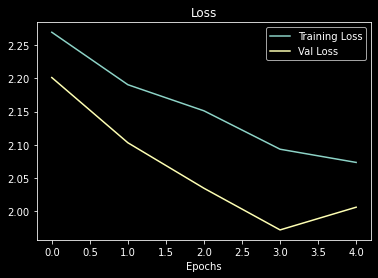

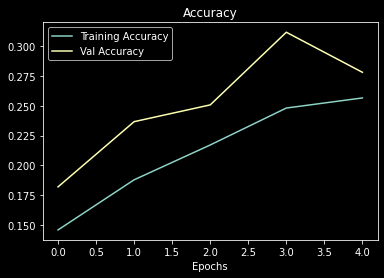

In [153]:
loss_curves(history_10)

### 7. Repeat unitl satisfied

We coulld keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How?

By running lots of experiments, namely:
* Restructuring our model's architecture (increasing layers/hidden units)
* Adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance) 
* Try `Transfer Learning`

### Makinf a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
class_names

In [ ]:
def pred_and_plot(model , filename , class_names = class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """ 
    # Import the target image and preprocess it
    img = load_and_pred_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img , axis = 0))
    
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else :    
        pred_class = class_names[int(tf.round(pred[0]))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [ ]:
pred_and_plot(model = model_10,
              filename = "03-steak.jpeg",
              class_names = class_names)

### Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10